In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import requests
import cftime

# Download files

In [2]:
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    print(local_filename)

In [4]:
y = 2021
for m in range(1,13):
    path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-LUMCON-101_{y}_{m:02d}.nc'
    download_file(path)

for m in range(1,13):
    path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-LUMCON-102_{y}_{m:02d}.nc'
    download_file(path)

for m in range(1,13):
    path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-WAVCIS_CSI03_{y}_{m:02d}.nc'
    download_file(path)

for m in range(1,13):
    path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-WAVCIS_CSI06_{y}_{m:02d}.nc'
    download_file(path)

for m in range(1,13):
    path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-WAVCIS_CSI10A_{y}_{m:02d}.nc'
    download_file(path)

for m in range(1,13):
    path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-wmo_42093_{y}_{m:02d}.nc'
    download_file(path)

for m in range(1,13):
    path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-wmo_lopl1_{y}_{m:02d}.nc'
    download_file(path)

gcoos_ioos-station-LUMCON-101_2021_01.nc
gcoos_ioos-station-LUMCON-101_2021_02.nc
gcoos_ioos-station-LUMCON-101_2021_03.nc
gcoos_ioos-station-LUMCON-101_2021_04.nc
gcoos_ioos-station-LUMCON-101_2021_05.nc
gcoos_ioos-station-LUMCON-101_2021_06.nc
gcoos_ioos-station-LUMCON-101_2021_07.nc
gcoos_ioos-station-LUMCON-101_2021_08.nc


HTTPError: 404 Client Error: Not Found for url: https://data.gcoos.org/data/waf/nc_by_platform/2021/ldn/gcoos_ioos-station-LUMCON-101_2021_09.nc

# Exploring one file to get clean code

In [4]:
path = 'gcoos_ioos-station-DISL-DISL_2022_01.nc'
ds = xr.open_dataset(path)
ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
ds.geospatial_lat_min

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11800\2778112983.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format


30.2513

In [5]:
# just cheking vars with temperature in them cos there are too many
VARS = []
for v in ds.data_vars:
    if 'temperature' in v:
        VARS.append(v)
VARS

['water_temperature_instrument_1',
 'air_temperature_instrument_1',
 'sea_surface_temperature_1',
 'air_temperature_1',
 'dew_point_temperature_1']

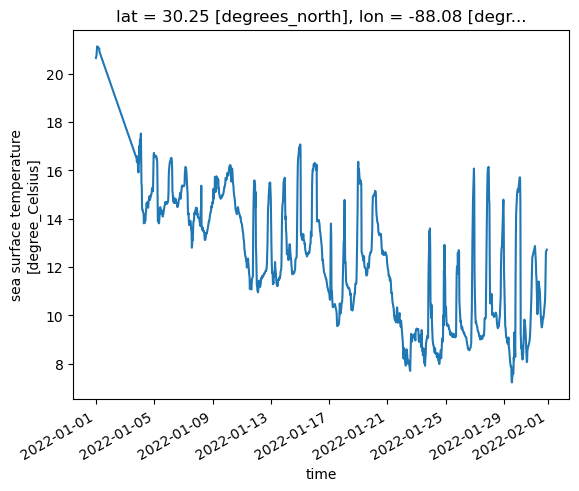

In [6]:
ds['sea_surface_temperature_1'].plot()

In [7]:
# cheking var with temp qc in them
qcv = []
for v in ds.data_vars:
    if 'sea_surface_temp_qc' in v:
        qcv.append(v)
qcv

['sea_surface_temp_qc_1_agg',
 'sea_surface_temp_qc_1_gap',
 'sea_surface_temp_qc_1_syn',
 'sea_surface_temp_qc_1_loc',
 'sea_surface_temp_qc_1_rng',
 'sea_surface_temp_qc_1_clm',
 'sea_surface_temp_qc_1_spk',
 'sea_surface_temp_qc_1_rtc',
 'sea_surface_temp_qc_1_flt']

In [8]:
ds[qcv]

<xarray.Dataset>
Dimensions:                    (time: 1300)
Coordinates:
  * time                       (time) datetime64[ns] 2022-01-01 ... 2022-01-3...
    lat                        float32 ...
    lon                        float32 ...
Data variables:
    sea_surface_temp_qc_1_agg  (time) float64 ...
    sea_surface_temp_qc_1_gap  (time) float64 ...
    sea_surface_temp_qc_1_syn  (time) float64 ...
    sea_surface_temp_qc_1_loc  (time) float64 ...
    sea_surface_temp_qc_1_rng  (time) float64 ...
    sea_surface_temp_qc_1_clm  (time) float64 ...
    sea_surface_temp_qc_1_spk  (time) float64 ...
    sea_surface_temp_qc_1_rtc  (time) float64 ...
    sea_surface_temp_qc_1_flt  (time) float64 ...
Attributes: (12/81)
    gts_ingest:                      true
    ioos_ingest:                     true
    infoUrl:                         http://data.gcoos.org
    wmo_platform_code:               DPHA1
    Conventions:                     CF-1.7, ACDD-1.3, IOOS-1.2, GCMD Earth S...
    id:                              gcoos_ioos-station-DISL-DISL_2022_01
    ...                              ...
    time_coverage_start:             2022-01-01 00:00:00
    time_coverage_end:               2022-01-31 22:30:00
    time_coverage_duration:          P30DT22H30M
    time_coverage_resolution:        PT30M
    cdm_data_type:                   TimeSeries
    featureType:                     timeSeries

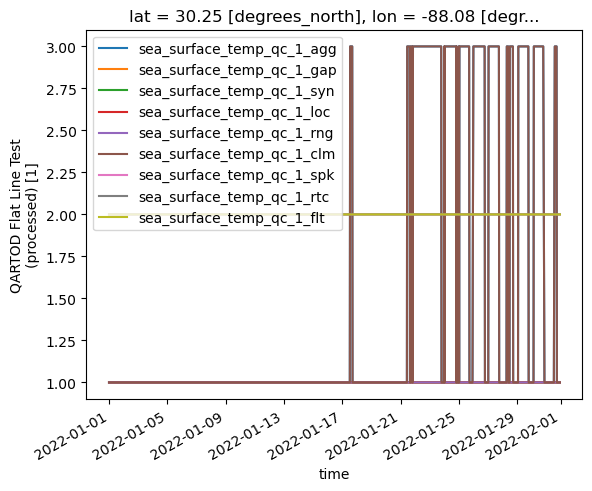

In [9]:
for q in qcv:
    if any(x in q for x in []):    
#     if any(x in q for x in ['flt', 'rtc', 'spk']):
        pass
    else:
        ds[q].plot(label=q)
plt.legend()
# won't use flt, rtc, spk masks as all values are 2= quality_not_evaluated

In [10]:
nqc = [q for q in qcv if not any(x in q for x in ['flt', 'rtc', 'spk']) ]
nqc

['sea_surface_temp_qc_1_agg',
 'sea_surface_temp_qc_1_gap',
 'sea_surface_temp_qc_1_syn',
 'sea_surface_temp_qc_1_loc',
 'sea_surface_temp_qc_1_rng',
 'sea_surface_temp_qc_1_clm']

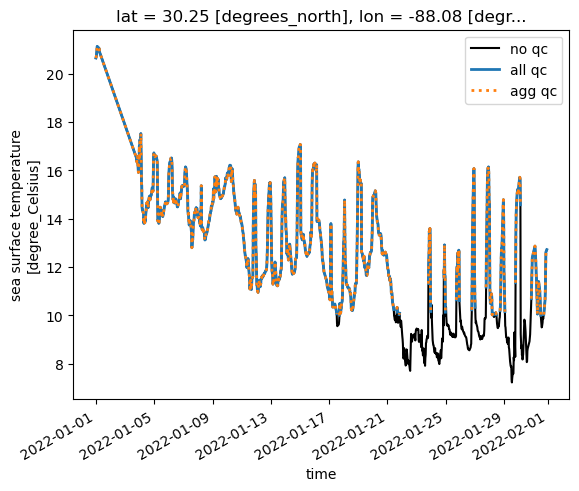

In [11]:
# figuring out which qc to use
sst = ds['sea_surface_temperature_1']
sst_qc = sst

#combining all qc
for qc in nqc:
    sst_qc = sst_qc.where(ds[qc]==1)
sst.plot(label='no qc', c='k')
sst_qc.plot(lw=2, label='all qc') # all qc

sst.where(ds['sea_surface_temp_qc_1_agg']==1).plot(ls=':', lw=2, label='agg qc') # agg qc
plt.legend()
# can probably use just agg, they look the same

# Putting all together

In [12]:
datasets = []
for m in range(1,13):
    path = f'gcoos_ioos-station-DISL-DISL_{y}_{m:02d}.nc'
    ds = xr.open_dataset(path)
    ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
    sst = ds['sea_surface_temperature_1'].where(ds['sea_surface_temp_qc_1_agg']==1)
    sst.name = 'sst' #to simplify name
    datasets.append(sst)
ds_full = xr.merge(datasets)

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\2104580544.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\2104580544.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\2104580544.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.Date

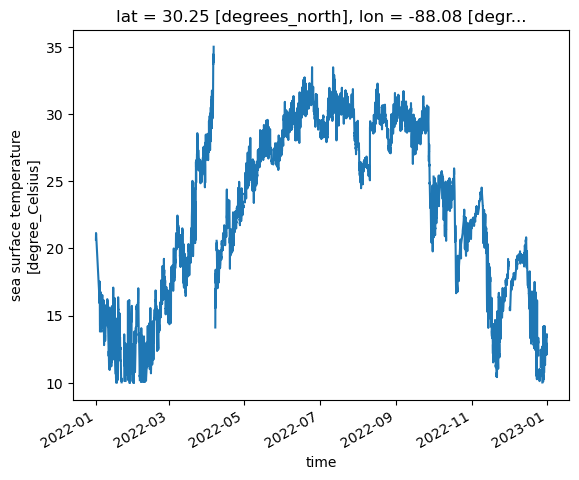

In [13]:
ds_full.sst.plot()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\1684792421.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()


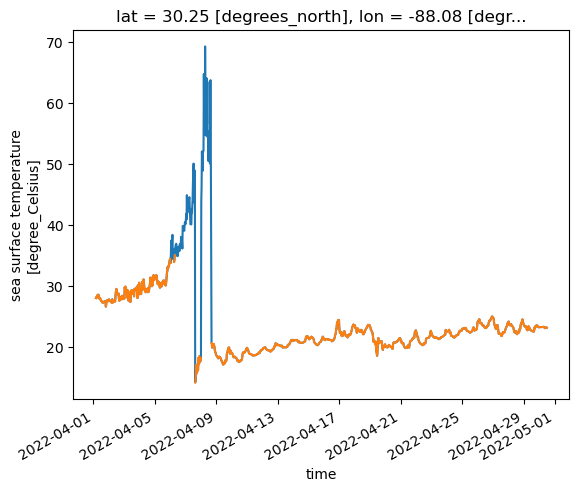

In [14]:
path = f'gcoos_ioos-station-DISL-DISL_{y}_04.nc'
ds = xr.open_dataset(path)
ds['time'] = ds.indexes['time'].to_datetimeindex() 
ds['sea_surface_temperature_1'].plot()
ds['sea_surface_temperature_1'].where(ds['sea_surface_temp_qc_1_agg']==1).plot()
# won't trust anything before the 8th probably

# Getting other stations

In [15]:
from bs4 import BeautifulSoup # this is a library to parse websites
import numpy as np

In [16]:
# we are trying to extract the links from this page
url ='https://data.gcoos.org/data/waf/nc_by_platform/2022/ldn/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup.contents # this is just an html structure

['HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN"',
 '\n',
 <html>
 <head>
 <title>Index of /data/waf/nc_by_platform/2022/ldn</title>
 </head>
 <body>
 <h1>Index of /data/waf/nc_by_platform/2022/ldn</h1>
 <table>
 <tr><th valign="top"><img alt="[ICO]" src="/icons/blank.gif"/></th><th><a href="?C=N;O=D">Name</a></th><th><a href="?C=M;O=A">Last modified</a></th><th><a href="?C=S;O=A">Size</a></th><th><a href="?C=D;O=A">Description</a></th></tr>
 <tr><th colspan="5"><hr/></th></tr>
 <tr><td valign="top"><img alt="[PARENTDIR]" src="/icons/back.gif"/></td><td><a href="/data/waf/nc_by_platform/2022/">Parent Directory</a></td><td> </td><td align="right">  - </td><td> </td></tr>
 <tr><td valign="top"><img alt="[   ]" src="/icons/unknown.gif"/></td><td><a href="SHA384SUM">SHA384SUM</a></td><td align="right">2023-01-01 00:57  </td><td align="right"> 94K</td><td> </td></tr>
 <tr><td valign="top"><img alt="[   ]" src="/icons/unknown.gif"/></td><td><a href="SHA384SUM_Archive">SHA384SUM_Archive</a></td

In [17]:
# 'a' are all link elements
links = soup.find_all('a')
links

[<a href="?C=N;O=D">Name</a>,
 <a href="?C=M;O=A">Last modified</a>,
 <a href="?C=S;O=A">Size</a>,
 <a href="?C=D;O=A">Description</a>,
 <a href="/data/waf/nc_by_platform/2022/">Parent Directory</a>,
 <a href="SHA384SUM">SHA384SUM</a>,
 <a href="SHA384SUM_Archive">SHA384SUM_Archive</a>,
 <a href="gcoos_ioos-station-DISL-BSCA_2022_01.nc">gcoos_ioos-station-DISL-BSCA_2022_01.nc</a>,
 <a href="gcoos_ioos-station-DISL-BSCA_2022_02.nc">gcoos_ioos-station-DISL-BSCA_2022_02.nc</a>,
 <a href="gcoos_ioos-station-DISL-BSCA_2022_03.nc">gcoos_ioos-station-DISL-BSCA_2022_03.nc</a>,
 <a href="gcoos_ioos-station-DISL-BSCA_2022_05.nc">gcoos_ioos-station-DISL-BSCA_2022_05.nc</a>,
 <a href="gcoos_ioos-station-DISL-BSCA_2022_06.nc">gcoos_ioos-station-DISL-BSCA_2022_06.nc</a>,
 <a href="gcoos_ioos-station-DISL-BSCA_2022_07.nc">gcoos_ioos-station-DISL-BSCA_2022_07.nc</a>,
 <a href="gcoos_ioos-station-DISL-BSCA_2022_08.nc">gcoos_ioos-station-DISL-BSCA_2022_08.nc</a>,
 <a href="gcoos_ioos-station-DISL-BSCA_2

In [18]:
all_hrefs = [a.get('href') for a in soup.find_all('a')] # get the href bit from all the links
all_hrefs

['?C=N;O=D',
 '?C=M;O=A',
 '?C=S;O=A',
 '?C=D;O=A',
 '/data/waf/nc_by_platform/2022/',
 'SHA384SUM',
 'SHA384SUM_Archive',
 'gcoos_ioos-station-DISL-BSCA_2022_01.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_02.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_03.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_05.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_06.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_07.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_08.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_09.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_10.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_11.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_12.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_12_airPressure_1.csv',
 'gcoos_ioos-station-DISL-BSCA_2022_12_air_temperature_1.csv',
 'gcoos_ioos-station-DISL-BSCA_2022_12_dissolved_oxygen_1.csv',
 'gcoos_ioos-station-DISL-BSCA_2022_12_salinity_1.csv',
 'gcoos_ioos-station-DISL-BSCA_2022_12_turbidity_1.csv',
 'gcoos_ioos-station-DISL-BSCA_2022_12_winds_1.csv',
 'gcoos_ioos-station-DISL-CATA_2022_01.nc

In [19]:
nc_hrefs = [ref for ref in all_hrefs if '.nc' in ref] # the links that end with .nc
nc_hrefs

['gcoos_ioos-station-DISL-BSCA_2022_01.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_02.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_03.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_05.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_06.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_07.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_08.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_09.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_10.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_11.nc',
 'gcoos_ioos-station-DISL-BSCA_2022_12.nc',
 'gcoos_ioos-station-DISL-CATA_2022_01.nc',
 'gcoos_ioos-station-DISL-CATA_2022_02.nc',
 'gcoos_ioos-station-DISL-CATA_2022_05.nc',
 'gcoos_ioos-station-DISL-CATA_2022_06.nc',
 'gcoos_ioos-station-DISL-CATA_2022_07.nc',
 'gcoos_ioos-station-DISL-CATA_2022_08.nc',
 'gcoos_ioos-station-DISL-CATA_2022_09.nc',
 'gcoos_ioos-station-DISL-CATA_2022_10.nc',
 'gcoos_ioos-station-DISL-CATA_2022_11.nc',
 'gcoos_ioos-station-DISL-CATA_2022_12.nc',
 'gcoos_ioos-station-DISL-DISL_2022_01.nc',
 'gcoos_ioos-station-DISL-DISL_2

In [20]:
stations = np.unique([el.split('_')[1] for el in nc_hrefs]) # split a line at '_' and get the 2nd section
                                                            # get unique names - remove repetitions
stations

array(['ioos-station-DISL-BSCA', 'ioos-station-DISL-CATA',
       'ioos-station-DISL-DISL', 'ioos-station-DISL-MBLA',
       'ioos-station-DISL-PPTA', 'ioos-station-LUMCON-101',
       'ioos-station-LUMCON-102', 'ioos-station-SCCF-11',
       'ioos-station-SCCF-13', 'ioos-station-SCCF-18',
       'ioos-station-SCCF-53', 'ioos-station-SCCF-56',
       'ioos-station-USF-COMPS-ARP', 'ioos-station-USF-COMPS-C10',
       'ioos-station-USF-COMPS-C12', 'ioos-station-USF-COMPS-C13',
       'ioos-station-USF-COMPS-FHP', 'ioos-station-USF-COMPS-SHP',
       'ioos-station-wmo-42044', 'ioos-station-wmo-42048',
       'ioos-station-wmo-42049', 'ioos-station-wmo-42051',
       'ioos-station-wmo-42067', 'ioos-station-wmo-42084',
       'ioos-station-wmo-42091', 'ioos-station-wmo-42095',
       'ioos-station-wmo-42097', 'ioos-station-wmo-42098',
       'ioos-station-wmo-42099', 'ioos-station-wmo-42361',
       'ioos-station-wmo-42362', 'ioos-station-wmo-42369',
       'ioos-station-wmo-42370', 'ioos-s

In [21]:
# lets get rid of the ioos-station- part
# split by '-', take from 3rd element forward (can be 2 or 3 or more), and then join again
stIDs = ['-'.join(s.split('-')[2:]) for s in stations]
stIDs

['DISL-BSCA',
 'DISL-CATA',
 'DISL-DISL',
 'DISL-MBLA',
 'DISL-PPTA',
 'LUMCON-101',
 'LUMCON-102',
 'SCCF-11',
 'SCCF-13',
 'SCCF-18',
 'SCCF-53',
 'SCCF-56',
 'USF-COMPS-ARP',
 'USF-COMPS-C10',
 'USF-COMPS-C12',
 'USF-COMPS-C13',
 'USF-COMPS-FHP',
 'USF-COMPS-SHP',
 'wmo-42044',
 'wmo-42048',
 'wmo-42049',
 'wmo-42051',
 'wmo-42067',
 'wmo-42084',
 'wmo-42091',
 'wmo-42095',
 'wmo-42097',
 'wmo-42098',
 'wmo-42099',
 'wmo-42361',
 'wmo-42362',
 'wmo-42369',
 'wmo-42370',
 'wmo-42372',
 'wmo-42373',
 'wmo-42375',
 'wmo-42377',
 'wmo-42379',
 'wmo-42383',
 'wmo-42384',
 'wmo-42385',
 'wmo-42386',
 'wmo-42388',
 'wmo-42390',
 'wmo-42394',
 'wmo-42395',
 'wmo-42397',
 'wmo-42400',
 'wmo-42402',
 'wmo-42403',
 'wmo-42851',
 'wmo-42864',
 'wmo-42865',
 'wmo-42866',
 'wmo-42873',
 'wmo-42874',
 'wmo-42876',
 'wmo-42877',
 'wmo-42880',
 'wmo-42881',
 'wmo-42882',
 'wmo-42884',
 'wmo-42887',
 'wmo-42888',
 'wmo-42891',
 'wmo-42892',
 'wmo-42896',
 'wmo-42901',
 'wmo-42902',
 'wmo-42906',
 'wm

## So now you can use this structure to get any STID, Y, M combination for any STID value in the list above

In [22]:
# example 'https://data.gcoos.org/data/waf/nc_by_platform/2022/ldn/gcoos_ioos-station-DISL-CATA_2022_12.nc'
STID='DISL-CATA'
base_url = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-{STID}_{y}_{m:02d}.nc'
base_url

'https://data.gcoos.org/data/waf/nc_by_platform/2022/ldn/gcoos_ioos-station-DISL-CATA_2022_12.nc'

# Combining all

In [23]:
# dowload
STID='DISL-DISL'
for y in range(2020, 2023):
    for m in range(1,13):
        path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-{STID}_{y}_{m:02d}.nc'
        try:
            download_file(path)
        except:
            print(f'Path not found: {path}')

Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2000/ldn/gcoos_ioos-station-DISL-DISL_2000_01.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2000/ldn/gcoos_ioos-station-DISL-DISL_2000_02.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2000/ldn/gcoos_ioos-station-DISL-DISL_2000_03.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2000/ldn/gcoos_ioos-station-DISL-DISL_2000_04.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2000/ldn/gcoos_ioos-station-DISL-DISL_2000_05.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2000/ldn/gcoos_ioos-station-DISL-DISL_2000_06.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2000/ldn/gcoos_ioos-station-DISL-DISL_2000_07.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2000/ldn/gcoos_ioos-station-DISL-DISL_2000_08.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2000/ldn/gcoos_ioos-station-DISL-DISL_200

Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2006/ldn/gcoos_ioos-station-DISL-DISL_2006_03.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2006/ldn/gcoos_ioos-station-DISL-DISL_2006_04.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2006/ldn/gcoos_ioos-station-DISL-DISL_2006_05.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2006/ldn/gcoos_ioos-station-DISL-DISL_2006_06.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2006/ldn/gcoos_ioos-station-DISL-DISL_2006_07.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2006/ldn/gcoos_ioos-station-DISL-DISL_2006_08.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2006/ldn/gcoos_ioos-station-DISL-DISL_2006_09.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2006/ldn/gcoos_ioos-station-DISL-DISL_2006_10.nc
Path not found: https://data.gcoos.org/data/waf/nc_by_platform/2006/ldn/gcoos_ioos-station-DISL-DISL_200

gcoos_ioos-station-DISL-DISL_2020_01.nc
gcoos_ioos-station-DISL-DISL_2020_02.nc
gcoos_ioos-station-DISL-DISL_2020_03.nc
gcoos_ioos-station-DISL-DISL_2020_04.nc
gcoos_ioos-station-DISL-DISL_2020_05.nc
gcoos_ioos-station-DISL-DISL_2020_06.nc
gcoos_ioos-station-DISL-DISL_2020_07.nc
gcoos_ioos-station-DISL-DISL_2020_08.nc
gcoos_ioos-station-DISL-DISL_2020_09.nc
gcoos_ioos-station-DISL-DISL_2020_10.nc
gcoos_ioos-station-DISL-DISL_2020_11.nc
gcoos_ioos-station-DISL-DISL_2020_12.nc
gcoos_ioos-station-DISL-DISL_2021_01.nc
gcoos_ioos-station-DISL-DISL_2021_02.nc
gcoos_ioos-station-DISL-DISL_2021_03.nc
gcoos_ioos-station-DISL-DISL_2021_04.nc
gcoos_ioos-station-DISL-DISL_2021_05.nc
gcoos_ioos-station-DISL-DISL_2021_06.nc
gcoos_ioos-station-DISL-DISL_2021_07.nc
gcoos_ioos-station-DISL-DISL_2021_08.nc
gcoos_ioos-station-DISL-DISL_2021_09.nc
gcoos_ioos-station-DISL-DISL_2021_10.nc
gcoos_ioos-station-DISL-DISL_2021_11.nc
gcoos_ioos-station-DISL-DISL_2021_12.nc
Path not found: https://data.gcoos.org/d

In [24]:
# combine file
# can put an external y loop for a long term ds or just pick a year
y = 2022
datasets = []
for m in range(1,13):
    path = f'gcoos_ioos-station-{STID}_{y}_{m:02d}.nc'
    ds = xr.open_dataset(path)
    ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
    sst = ds['sea_surface_temperature_1'].where(ds['sea_surface_temp_qc_1_agg']==1)
    sst.name = 'sst' #to simplify name
    datasets.append(sst)
ds_full = xr.merge(datasets)

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\87516021.py:8: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\87516021.py:8: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\87516021.py:8: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIn

Text(0.5, 1.0, 'DISL-DISL')

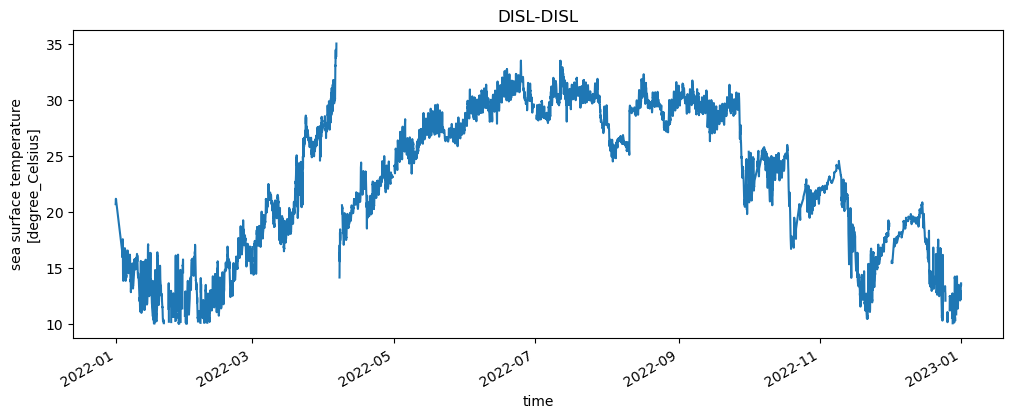

In [25]:
# plot
plt.figure(figsize=[12,4])
ds_full.sst.plot()
plt.title(STID)
# if creating multiple plots, there needs to be a ylim

In [26]:
import pandas as pd

In [27]:
# download file from : https://arcos.disl.org/download-data/download-data?stationnew=628

In [47]:
dvars = ['yeardata', 'jday', 'timedata']
df = pd.read_csv('/Users/hmlbr/Downloads/Dauphin_Island_hyd.csv',skiprows=16, )
df['jday'][df['timedata']==2400] = df['jday'] + 1
df['timedata'] = df['timedata'].astype(str)
df['timedata'][df['timedata']=='2400'] = '0000'
timestr = df[dvars].astype(str).apply(' '.join,axis=1)
times = pd.to_datetime(timestr, format='%Y %j %H%M')
df["date"] = times
df.set_index('date', inplace=True)
df['watertemp1_avg'][df['watertemp1_avg']<0] = np.nan

NameError: name 'hf' is not defined

In [50]:
dvars = ['yeardata', 'jday', 'timedata']
df = pd.read_csv('/Users/hmlbr/Downloads/Dauphin_Island_hyd.csv',skiprows=16, )
df['jday'][df['timedata']==2400] = df['jday'] + 1
df['timedata'] = df['timedata'].astype(str)
df['timedata'][df['timedata']=='2400'] = '0000'
timestr = df[dvars].astype(str).apply(' '.join,axis=1)
times = pd.to_datetime(timestr, format='%Y %j %H%M')
df["date"] = times
df.set_index('date', inplace=True)
df['watertemp1_avg'][df['watertemp1_avg']<0] = np.nan

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\500491882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jday'][df['timedata']==2400] = df['jday'] + 1
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\500491882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timedata'][df['timedata']=='2400'] = '0000'
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_1200\500491882.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wat

<Axes: xlabel='date'>

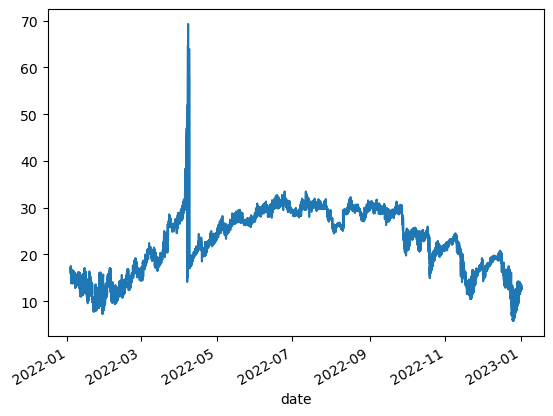

In [51]:
df['watertemp1_avg'].plot()
# plt.ylim(10,40)